In [1]:
import pandas as pd
data = pd.read_excel('my_data.xlsx')
del data['Unnamed: 0']

In [2]:
data

,load_N_900030148/Net1,load_N_900002018/Net1,load_N_900119609/Net1,load_N_900060773/Net1,load_N_900054024/Net1,load_N_900080826/Net1,load_N_900012899/Net1,load_N_900059587/Net1,load_N_900032807/Net1,load_N_900032441/Net1,...,load_N_900056709/Net1,load_N_920040275/Net1,load_N_900037130/Net1,load_N_900060843/Net1,load_N_900037529/Net1,load_N_900081045/Net1,load_N_920040184/Net1,load_N_900061000/Net1,load_N_900061002/Net1,load_N_900059635/Net1
0,53.969358,60.894855,23.887297,39.650970,83.235439,65.930841,26.434505,66.678573,16.189144,51.330526,...,17.857948,63.616381,46.286389,21.442896,75.135689,48.817476,70.428189,44.077141,71.779837,16.299930
1,53.959347,60.883560,23.882866,39.643615,83.220000,65.918611,26.429601,66.666205,16.186141,51.321004,...,17.854635,63.604580,46.277804,21.438919,75.121752,48.808421,70.415125,44.068965,71.766522,16.296907
2,53.939615,60.861296,23.874132,39.629118,83.189568,65.894506,26.419937,66.641826,16.180222,51.302237,...,17.848106,63.581322,46.260881,21.431079,75.094282,48.790573,70.389376,44.052850,71.740279,16.290947
3,53.910727,60.828700,23.861346,39.607894,83.145014,65.859215,26.405787,66.606135,16.171557,51.274761,...,17.838547,63.547269,46.236105,21.419601,75.054063,48.764442,70.351677,44.029256,71.701857,16.282222
4,53.873489,60.786684,23.844864,39.580536,83.087584,65.813725,26.387548,66.560128,16.160386,51.239345,...,17.826226,63.503376,46.204169,21.404806,75.002222,48.730759,70.303084,43.998844,71.652331,16.270976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,53.365949,60.214015,23.620223,39.207649,82.304818,65.193696,26.138952,65.933068,16.008140,50.756620,...,17.658285,62.905112,45.768880,21.203152,74.295628,48.271668,69.640761,43.584333,70.977296,16.117688
296,53.381462,60.231519,23.627089,39.219046,82.328745,65.212647,26.146550,65.952234,16.012794,50.771375,...,17.663419,62.923399,45.782186,21.209316,74.317226,48.285701,69.661005,43.597003,70.997929,16.122373
297,53.393514,60.245117,23.632423,39.227900,82.347331,65.227370,26.152453,65.967124,16.016409,50.782837,...,17.667406,62.937604,45.792521,21.214104,74.334004,48.296602,69.676732,43.606845,71.013958,16.126013
298,53.401753,60.254413,23.636070,39.233954,82.360038,65.237435,26.156488,65.977303,16.018880,50.790674,...,17.670133,62.947316,45.799587,21.217378,74.345474,48.304054,69.687484,43.613574,71.024916,16.128501


In [3]:
#200节点位置
import random
import numpy as np 
import matplotlib.pyplot as plt
pos_x = []
pos_y = []
for i in range(200):
    pos_x.append(random.random() * 100)
    pos_y.append(random.random() * 100)
pos_x = np.array(pos_x)
pos_y = np.array(pos_y)

##生成错误节点
wrong_rate = 0.1
temp_index= np.arange(200)
random.shuffle(temp_index)
wrong_index = temp_index[:int(200 * (wrong_rate))]
true_index = temp_index[int(200 * (wrong_rate)):]

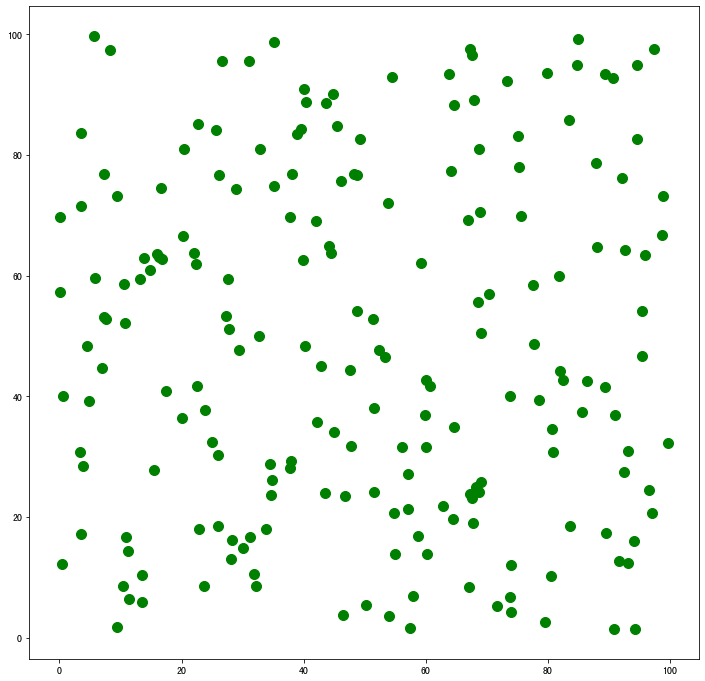

In [4]:
plt.figure(figsize = (12,12))
plt.plot(pos_x,pos_y,'g.',markersize = 20)

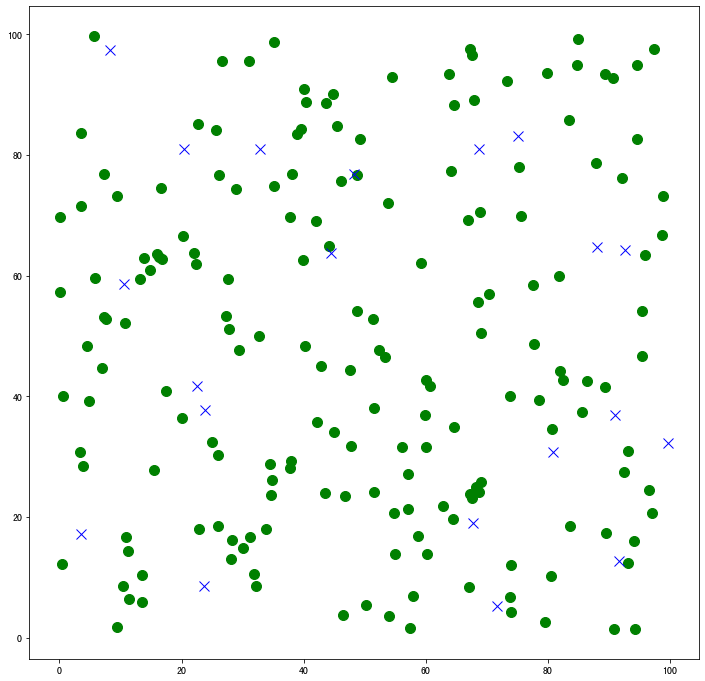

In [5]:
plt.figure(figsize = (12,12))
plt.plot(pos_x[true_index],pos_y[true_index],'g.',markersize = 20)
plt.plot(pos_x[wrong_index],pos_y[wrong_index],'bx',markersize = 10)

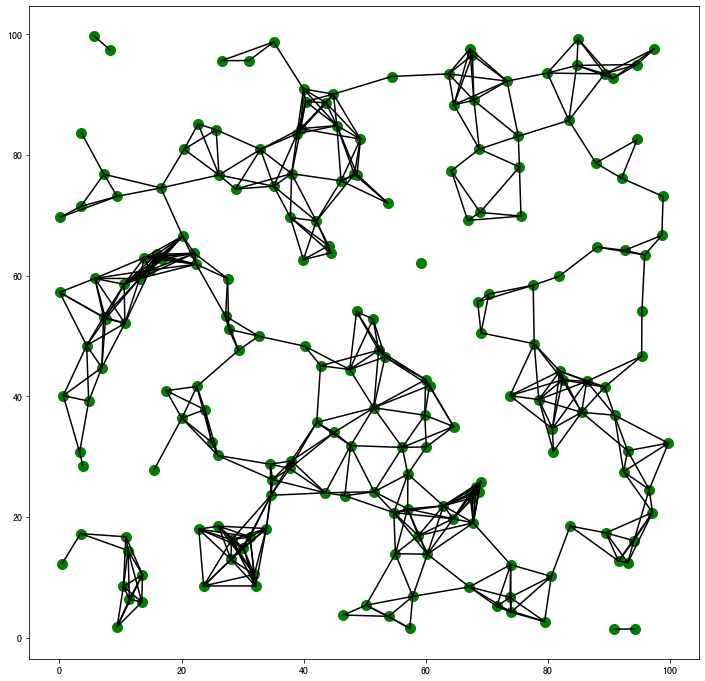

In [6]:
plt.figure(figsize = (12,12))
plt.plot(pos_x,pos_y,'g.',markersize = 20)

for i in range(200):
    for j in range(i + 1,200):
        if (pos_x[i] - pos_x[j]) ** 2 + (pos_y[i] - pos_y[j]) ** 2 < 100:
            plt.plot(np.array([pos_x[i],pos_x[j]]),np.array([pos_y[i],pos_y[j]]),'k-')

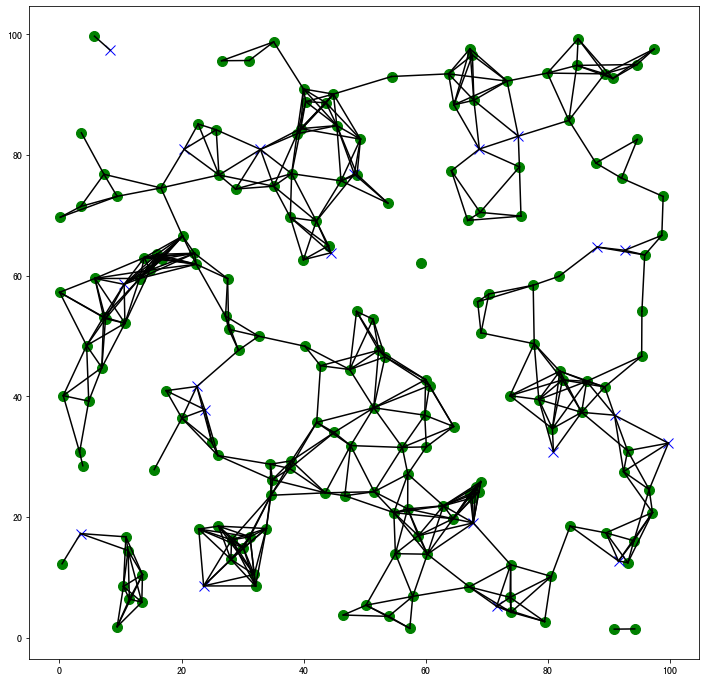

In [7]:
plt.figure(figsize = (12,12))
plt.plot(pos_x[true_index],pos_y[true_index],'g.',markersize = 20)
plt.plot(pos_x[wrong_index],pos_y[wrong_index],'bx',markersize = 10)
for i in range(200):
    for j in range(i + 1,200):
        if (pos_x[i] - pos_x[j]) ** 2 + (pos_y[i] - pos_y[j]) ** 2 < 100:
            plt.plot(np.array([pos_x[i],pos_x[j]]),np.array([pos_y[i],pos_y[j]]),'k-')

In [8]:
##将错误节点注入错误数据
import random

def make_one_column_mistake(dat,percent):
    #dat是一维数据，percent是错误率
    #返回一个大小一样的新数据
    number = int(len(dat) * percent)
    list_temp = np.arange(len(dat))
    random.shuffle(list_temp)
    list_temp = list_temp[:number]
    random_temp_list = np.zeros(len(list_temp))
    for i in range(len(list_temp)):
        while 1:
            temp_number = random.uniform(dat[list_temp[i]] - 5,dat[list_temp[i]] + 5)
            if abs(temp_number - dat[list_temp[i]]) > 3:
                random_temp_list[i] = temp_number
                break
    for i in range(len(list_temp)):
        dat[list_temp[i]] = random_temp_list[i]
    return dat

In [9]:
for i in range(len(wrong_index)):
    make_one_column_mistake(data[data.columns[wrong_index][i]],0.3)

## 第一阶段 自查

In [10]:
length_rem = 20
may_wrong_list = []
may_wrong_list_time = []
for i in range(200):
    for j in range(200 - length_rem - 1):
        temp = data.iloc[:,i][j : (j + length_rem)]
        mean_v = np.mean(temp)
        std_v = np.std(temp)
        if data.iloc[:,i][(j + length_rem)] > (mean_v + 1.5*np.sqrt(std_v)) or data.iloc[:,i][(j + length_rem)] < (mean_v - 1.5*np.sqrt(std_v)):
            may_wrong_list.append(i)
            may_wrong_list_time.append((j + length_rem))
            break

In [11]:
FAR = len(set(may_wrong_list).intersection(set(wrong_index)))/len(may_wrong_list)

### 第二步 做相似性分析

In [12]:
import math
def cal_ang(point_1, point_2, point_3):
    """
    根据三点坐标计算夹角
    :param point_1: 点1坐标
    :param point_2: 点2坐标
    :param point_3: 点3坐标
    :return: 返回任意角的夹角值，这里只是返回点2的夹角
    """
    a=math.sqrt((point_2[0]-point_3[0])*(point_2[0]-point_3[0])+(point_2[1]-point_3[1])*(point_2[1] - point_3[1]))
    b=math.sqrt((point_1[0]-point_3[0])*(point_1[0]-point_3[0])+(point_1[1]-point_3[1])*(point_1[1] - point_3[1]))
    c=math.sqrt((point_1[0]-point_2[0])*(point_1[0]-point_2[0])+(point_1[1]-point_2[1])*(point_1[1]-point_2[1]))
    A=math.degrees(math.acos((a*a-b*b-c*c)/(-2*b*c)))
    B=math.degrees(math.acos((b*b-a*a-c*c)/(-2*a*c)))
    C=math.degrees(math.acos((c*c-a*a-b*b)/(-2*a*b)))
    rad = np.cos(B/180 * np.pi)
    return rad

In [13]:
def cal_similarity(dat1,dat2):
    assert len(dat1) == len(dat2)
    temp = []
    for i in range(len(dat1) - 2):
        try:
            rad1 = cal_ang([0,dat1[i]],[1,dat1[i + 1]],[2,dat1[i + 2]])
            rad2 = cal_ang([0,dat2[i]],[1,dat2[i + 1]],[2,dat2[i + 2]])
            temp.append(abs(rad1 - rad2))
        except:
            pass
    return np.mean(temp)

In [14]:
cal_similarity(data.values[:,1],data.values[:,2])

7.4712357450697575e-06

In [15]:
cal_similarity(data.values[:,1],data.values[:,3])

0.7931624810159669

In [16]:
sim = []
for i in range(len(may_wrong_list)):
    pos_minex = pos_x[may_wrong_list[i]]
    pos_miney = pos_y[may_wrong_list[i]]
    nearlist = []
    for k in range(200):
        if (pos_x[i] - pos_x[k]) ** 2 + (pos_y[i] - pos_y[k]) ** 2 < 100 and k != may_wrong_list[i]:
            nearlist.append(i)
    sim_list = []
    for m in range(len(nearlist)):
        sim_list.append(cal_similarity(data.values[:,may_wrong_list[i]],data.values[:,nearlist[m]]))
    sim.append(np.mean(sim_list))

may_wrong_list = np.array(may_wrong_list)
must_wrong_list = may_wrong_list[np.where(np.array(sim) > 0.5)[0]]

In [17]:
FDA = len(set(must_wrong_list).intersection(set(wrong_index)))/len(must_wrong_list)

In [18]:
FDA

1.0

#### 写个循环画个图

In [19]:
data = pd.read_excel('my_data.xlsx')
del data['Unnamed: 0']

##生成错误节点



farlist = []
fdalist = []
for mmm in np.arange(0,0.2,0.02):
    wrong_rate = mmm
    temp_index= np.arange(200)
    random.shuffle(temp_index)
    wrong_index = temp_index[:int(200 * (wrong_rate))]
    true_index = temp_index[int(200 * (wrong_rate)):]
    
    for i in range(len(wrong_index)):
        make_one_column_mistake(data[data.columns[wrong_index][i]],0.2)

    length_rem = 30
    may_wrong_list = []
    may_wrong_list_time = []
    for i in range(200):
        for j in range(200 - length_rem - 1):
            temp = data.iloc[:,i][j : (j + length_rem)]
            mean_v = np.mean(temp)
            std_v = np.std(temp)
            if data.iloc[:,i][(j + length_rem)] > (mean_v + 3*np.sqrt(std_v)) or data.iloc[:,i][(j + length_rem)] < (mean_v - 3*np.sqrt(std_v)):
                may_wrong_list.append(i)
                may_wrong_list_time.append((j + length_rem))
                break
    if len(wrong_index) == 0:
        farlist.append(0)
    else:
        FAR = len(set(may_wrong_list).difference(set(wrong_index)))/(200 - len(wrong_index))            
        farlist.append(FAR)
    sim = []
    for i in range(len(may_wrong_list)):
        pos_minex = pos_x[may_wrong_list[i]]
        pos_miney = pos_y[may_wrong_list[i]]
        nearlist = []
        for k in range(200):
            if (pos_x[i] - pos_x[k]) ** 2 + (pos_y[i] - pos_y[k]) ** 2 < 100 and k != may_wrong_list[i]:
                nearlist.append(i)
        sim_list = []
        for m in range(len(nearlist)):
            sim_list.append(cal_similarity(data.values[:,may_wrong_list[i]],data.values[:,nearlist[m]]))
        sim.append(np.mean(sim_list))

    may_wrong_list = np.array(may_wrong_list)
    must_wrong_list = may_wrong_list[np.where(np.array(sim) > 0.5)[0]]
    if len(wrong_index) == 0:        
        fdalist.append(1)
    else:
        FDA = len(set(must_wrong_list).intersection(set(wrong_index)))/len(wrong_index)
        fdalist.append(FDA)

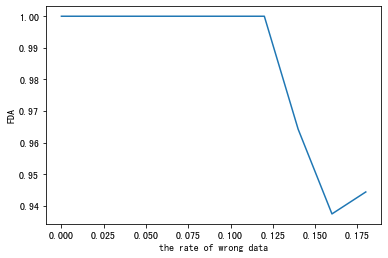

In [20]:
x_text = np.arange(0,0.2,0.02)
plt.plot(x_text,fdalist)
plt.xlabel('the rate of wrong data')
plt.ylabel('FDA')
plt.show()

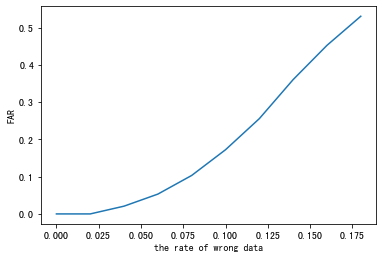

In [21]:
x_text = np.arange(0,0.2,0.02)
plt.plot(x_text,farlist,label = 'FAR')
plt.xlabel('the rate of wrong data')
plt.ylabel('FAR')

plt.show()